In [5]:
#!/usr/bin/env python

# # Imports

# Numerical and data processing libraries
import numpy as np
import pandas as pd
import pickle

from libs.paths import results_folder, data_folder
from libs import preprocessing_lib as pplib
from libs.label_mappings import get_label_meaning
import matplotlib.pyplot as plt

In [6]:
# Input files
signal_x = 'ECG'  # First signal
signal_y = 'PCG'  # Second signal (can be the same as signal_x)
label_x = 2       # Label from first signal
label_y = 2       # Label from second signal
fs_x = 500
fs_y = 3000

signals = {signal_x: [label_x, fs_x], signal_y: [label_y, fs_y]}

name_interval, name_x, name_y = get_label_meaning(signal_x, signal_y, label_x, label_y)
print(name_interval)

# # %% ULSGE Dataset results

# # Import Original

data_file_path = data_folder / "std_chvnge_df.pkl"
df = pd.read_pickle(data_file_path)

# Drop empty columns
df = df.drop(index=[491, 503])
df = df.reset_index(drop=True)

# Resample them to 50 Hz
# Optimize the processing of the dataset
for signal, arr in signals.items():
    fs = arr[1]
    df[f'{signal} Signal'] = df[f'{signal} Signal'].apply(
        lambda data: pplib.z_score_standardization(data))    
    df[f'{signal} Signal'] = df[f'{signal} Signal'].apply(
        lambda data: pplib.downsample(data, fs, 50))

import pickle

# Load predictions dynamically

with open(results_folder / "combined_processed_predictions.pkl", "rb") as f:
    all_data = pickle.load(f)

# Access predictions
ecg_smoothed = all_data["ECG"]["smoothed"]
ecg_max_temporal = all_data["ECG"]["sequence"]
pcg_smoothed = all_data["PCG"]["smoothed"]
pcg_max_temporal = all_data["PCG"]["sequence"]

print(f"ECG Smoothed Shape: {ecg_smoothed.shape}")
print(f"ECG Max Temporal Shape: {ecg_max_temporal.shape}")
print(f"PCG Smoothed Shape: {pcg_smoothed.shape}")
print(f"PCG Max Temporal Shape: {pcg_max_temporal.shape}")


QS2
ECG Smoothed Shape: (722,)
ECG Max Temporal Shape: (722,)
PCG Smoothed Shape: (722,)
PCG Max Temporal Shape: (722,)


In [7]:
first_column = ecg_smoothed[0][:, 0]

C:\Users\Mariana Saavedra\AppData\Local\Temp\ipykernel_9208\514583290.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  top.legend(loc=3)
C:\Users\Mariana Saavedra\AppData\Local\Temp\ipykernel_9208\514583290.py:49: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  top.legend(loc=3)


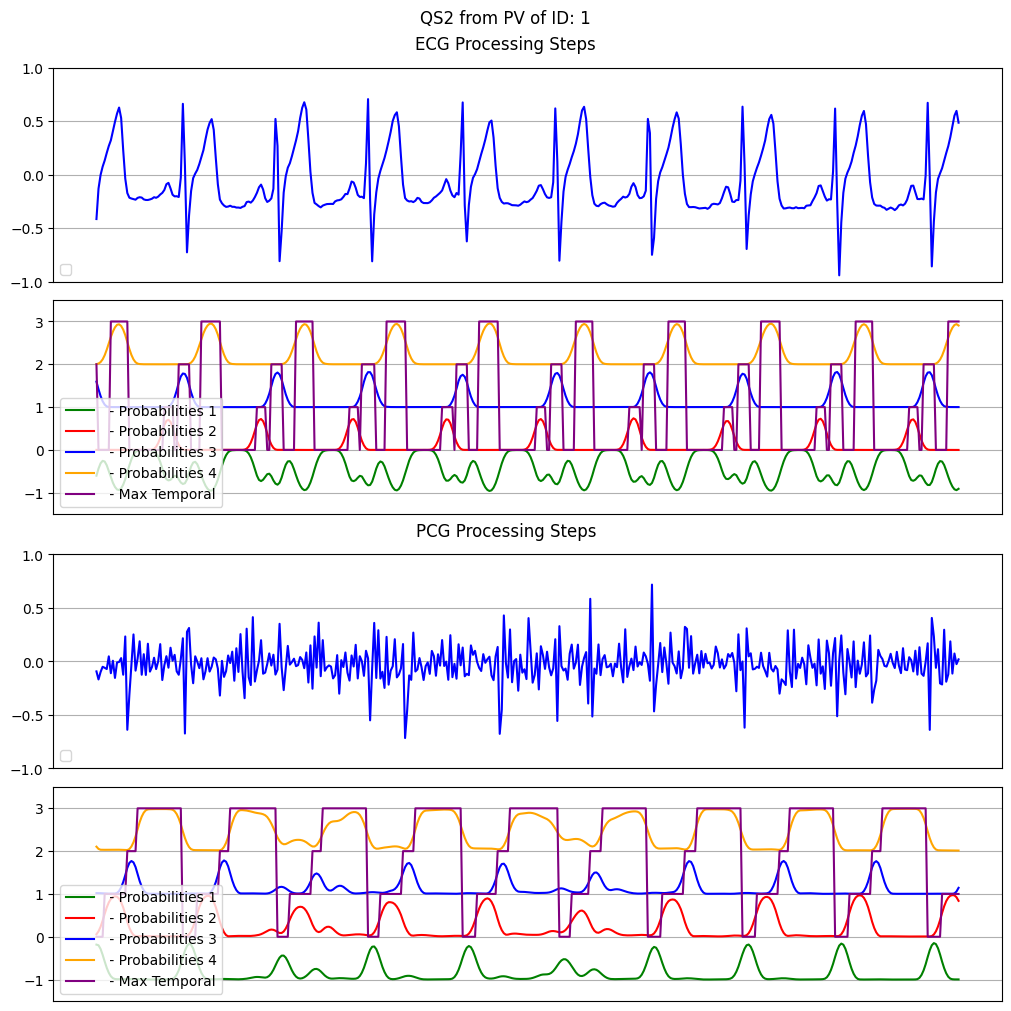

In [8]:
i = 2
ID = df['ID'].iloc[i]
AP = df['Auscultation Point'].iloc[i]

# Create main figure
fig = plt.figure(layout='constrained', figsize=(10, 10))
fig.suptitle(f'{name_interval} from {AP} of ID: {ID}')

subfigs = fig.subfigures(2, 1, hspace=0)

# ECG Processing Steps (Top, Mid, Bot)
ecg_subplots = subfigs[0].subplots(2, 1, sharex=True, sharey=False)  # Set sharey=False here
subfigs[0].suptitle('ECG Processing Steps')

top, mid = ecg_subplots  # Assign subplots

top.plot(pplib.min_max_norm2(df['ECG Signal'].iloc[i])[380:800], color='blue')
top.set_xticks([])
top.set_ylim(-1, 1)
top.legend(loc=3)
top.grid()

mid.plot(all_data["ECG"]["smoothed"][i][:, 0][380:800]-1, label=' - Probabilities 1', color='green')
mid.plot(all_data["ECG"]["smoothed"][i][:, 1][380:800]+0, label=' - Probabilities 2', color='red')
mid.plot(all_data["ECG"]["smoothed"][i][:, 2][380:800]+1, label=' - Probabilities 3', color='blue')
mid.plot(all_data["ECG"]["smoothed"][i][:, 3][380:800]+2, label=' - Probabilities 4', color='orange')
mid.plot(all_data["ECG"]["sequence"][i][380:800], label=' - Max Temporal', color='purple')

mid.set_xticks([])
mid.set_ylim(-1.5, 3.5)
mid.legend(loc=3)
mid.grid()

# bot.plot(all_data["ECG"]["max_temporal"][i][380:800], label=name_x, color='green')
# bot.set_xticks([])
# bot.set_ylim(-0.5, 3.5)
# bot.legend(loc=3)
# bot.grid()

# PCG Processing Steps (Top, Mid, Bot)
pcg_subplots = subfigs[1].subplots(2, 1, sharex=True, sharey=False)  # Set sharey=False here
subfigs[1].suptitle('PCG Processing Steps')

top, mid = pcg_subplots  # Assign subplots

top.plot(pplib.min_max_norm2(df['PCG Signal'].iloc[i])[380:800], color='blue')
top.set_xticks([])
top.set_ylim(-1, 1)
top.legend(loc=3)
top.grid()

mid.plot(all_data["PCG"]["smoothed"][i][:, 0][380:800]-1, label=' - Probabilities 1', color='green')
mid.plot(all_data["PCG"]["smoothed"][i][:, 1][380:800]+0, label=' - Probabilities 2', color='red')
mid.plot(all_data["PCG"]["smoothed"][i][:, 2][380:800]+1, label=' - Probabilities 3', color='blue')
mid.plot(all_data["PCG"]["smoothed"][i][:, 3][380:800]+2, label=' - Probabilities 4', color='orange')
mid.plot(all_data["PCG"]["sequence"][i][380:800], label=' - Max Temporal', color='purple')

mid.set_xticks([])
mid.set_ylim(-1.5, 3.5)
mid.legend(loc=3)
mid.grid()


# bot.plot(all_data["PCG"]["max_temporal"][i][380:800], label=name_x, color='green')
# bot.set_xticks([])
# bot.set_ylim(-0.5, 4)
# bot.legend(loc=3)
# bot.grid()

# Save the plot
plt.savefig(f"{name_interval}_{i}_Unet.png")  # Save as PNG

plt.show()